## Problem Statement
# Prepare a classification model using Naive Bayes for salary data 

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>
1. [Introduction to Naive Bayes algorithm](#1)
2. [Data Exploration](#2)
    - 2.1 [Missing Values](#2.1)
3. [Exploratory Data Analysis](#3)
    - 3.1 [Outlier Detection](#3.1)
    - 3.2 [Visualize the distribution of 'age' and 'hoursperweek'](#3.2)
    - 3.3 [Now let's look how numerical columns affect Salary. ](#3.3)
    - 3.4 [Categorical Variables](#3.4)
    - 3.5 [Bar plot for all categorical variables in the dataset](#3.5)
    - 3.6 [Analysis of the response column](#3.6)
4. [Data Visualization](#4)
    - 4.1 [Analyzing Relation by plotting Continuous features with the Target Feature](#4.1)
    - 4.2 [Visualize the Salary and Employee rate by age](#4.2)
    - 4.3 [Visualize the Salary for >50k by working hours per week](#4.3)
    - 4.4 [Visualize the Salary rate by Workclass](#4.4)
    - 4.5 [Visualize the Salary rate by Education](#4.5)
5. [Data Cleaning](#5)
    - 5.1 [Data Pre-Processing](#5.1)
    - 5.2 [Label Encoding Technique](#5.2)
    - 5.3 [Test Train Split With Imbalanced Dataset](#5.3)
6. [About Stratify](#6)
    - 6.1 [Grid search using Stratified Kfold Splits on Imbalanced Dataset](#6.1)
    - 6.2 [Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset](#6.2)
7. [Handling imbalance data using SMOTE based techniques](#7)
    - 7.1 [SMOTE Oversampling technique](#7.1)
    - 7.2 [ADASYN: Adaptive Synthetic Sampling Approach](#7.2)
    - 7.3 [Hybridization: SMOTE + Tomek Links](#7.3)
    - 7.4 [Hybridization: SMOTE + ENN](#7.4)
    - 7.5 [Performance Analysis after Resampling](#7.5)
8. [Machine Learning: Classification](#8)
    - 8.1 [Sklearn Naive Bayes Classifier](#8.1)
    - 8.2 [Confusion Matrix](#8.2)
    - 8.3 [Lower the Thresohold](#8.3)
    - 8.4 [RUC-AUC Curve and Score](#8.4)
    - 8.5 [Finding the Optimal Threshold Value](#8.5)
    - 8.6 [Classification Report](#8.6)
    - 8.7 [Predictions](#8.7)
9. [Zero Probability Phenomena](#9)
    - 9.1 [Hyperparameter Tuning to improve Accuracy](#9.1)
10. [Conclusion, Pros and Cons](#10)

## **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

## **Gaussian Naïve Bayes algorithm**


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

#### Load the Raw Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import dataprep
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
# Importing Training Dataset
salary_train = pd.read_csv('C:/Users/Moin Dalvi/Documents/Data Science Material/Data Science Assignments/Naive Bayes/SalaryData_train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Importing Testing Dataset
salary_test = pd.read_csv('C:/Users/Moin Dalvi/Documents/Data Science Material/Data Science Assignments/Naive Bayes/SalaryData_test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True)
raw_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### 1.1 About the Dataset <a class="anchor" id="1.1"></a>
##### Attribute Information:

Data Description:

+ **age -- age of a person**
+ **workclass	-- A work class is a grouping of work**
+ **education	-- Education of an individuals**
+ **maritalstatus -- Marital status of an individulas**	
+ **occupation	 -- occupation of an individuals**
+ **relationship -- 	
+ **race --  Race of an Individual**
+ **sex --  Gender of an Individual**
+ **capitalgain --  profit received from the sale of an investment**	
+ **capitalloss	-- A decrease in the value of a capital asset**
+ **hoursperweek -- number of hours work per week**	
+ **native -- Native of an individual**
+ **Salary -- salary of an individual**

#### [Table of Contents](#0.1)

## 2. Data Exploration <a class="anchor" id="2"></a>

#### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [7]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Descriptive Statistics

In [8]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


#### All the columns data types are correctly identified

### In Data Analysis we will analyze to find out the below stuff
+ Missing values
+ All the Numerical Variables
+ Distribution of the Numerical Variables
+ Categorical Variables
+ Cardinality of Categorical Variables
+ Outliers
+ Relationshop between independent and dependent feature (Target)

#### [Table of Contents](#0.1)

### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [10]:
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

So we see that there are no missing values.

### Duplicated Values

#### print the duplicated rows

In [39]:
raw_data[raw_data.duplicated()]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [40]:
raw_data[raw_data.duplicated()].shape

(0, 15)

#### [Table of Contents](#0.1)

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore Numerical variables.

### Numerical Variables

In [18]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


#### Discrete Feature
+ Numerical variables are usually of 2 types 
+ Continuous variable and discrete variable

In [19]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


#### Continuous Variable

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


#### Categorical Variables

In [21]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


#### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [10]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [11]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts()/np.float(len(raw_data)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

#### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [12]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


##### We can see that **`native`** column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

In [16]:
raw_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

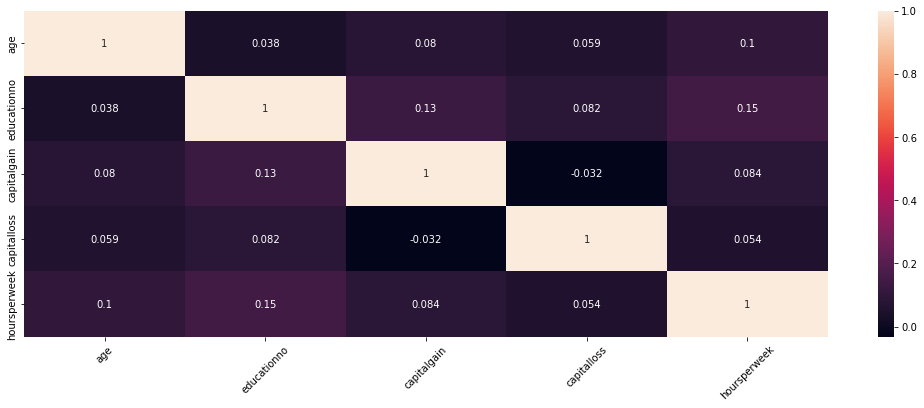

In [17]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

##### The scatter matrix does not reveal any clear relationship among age, education, capitalgain, capitalloss and Hoursperweek.


#### [Table of Contents](#0.1)

+ #####  Univariate plots

Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

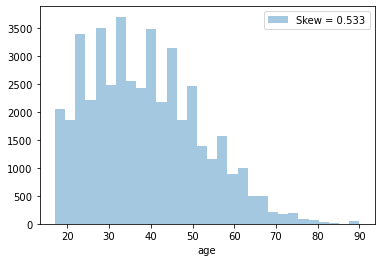

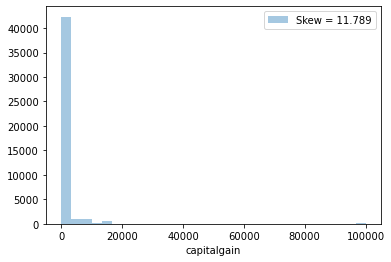

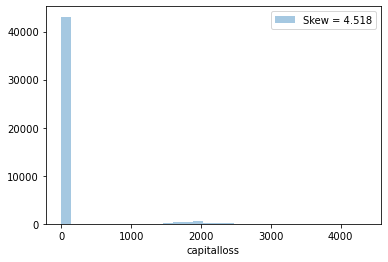

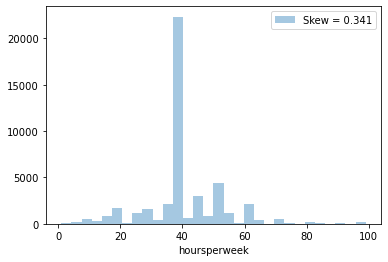

In [27]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [142]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(raw_data"[continuous_feature])))) 

The dataset contains 14 observations with more than 2 outliers


##### Aha! there exists some 14 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.

Let's examine the boxplots for the several distributions

In [20]:
continuous_feature

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

[Table of Contents](#0.1)

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

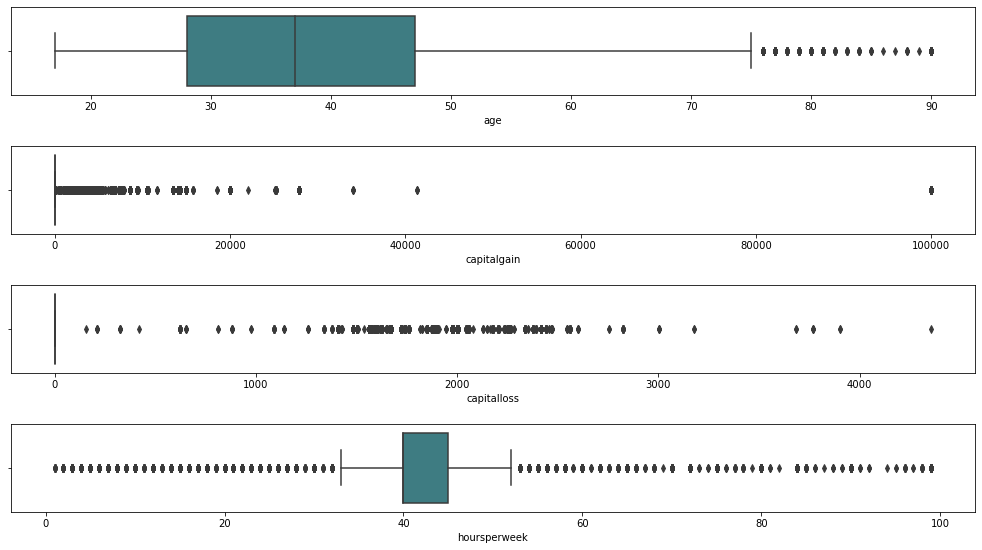

In [23]:
ot=raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

#### After Log-Transformation

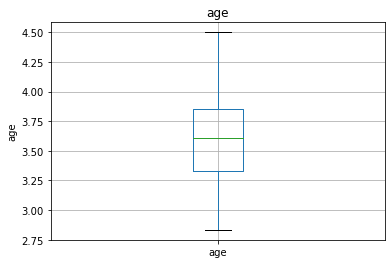

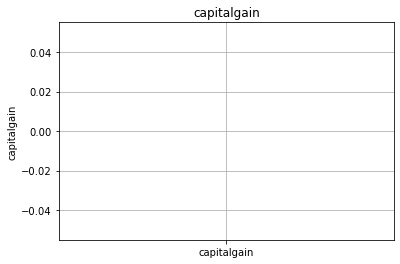

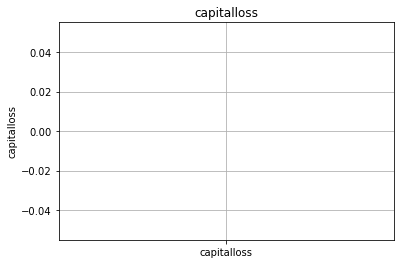

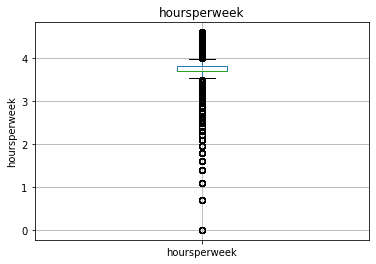

In [28]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

[Table of Contents](#0.1)

### 3.2 Visualize the distribution of 'age' and 'hoursperweek'<a class="anchor" id="3.2"></a>

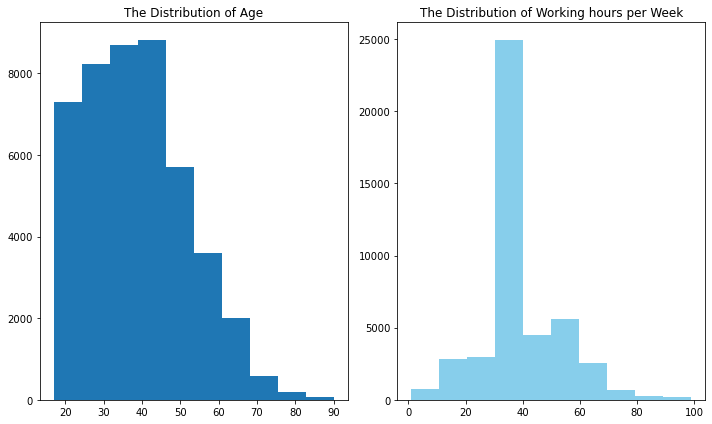

In [29]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

In [30]:
raw_data[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


+ The distribution of age: In this dataset, we have an extensive age range, from 17 to 90 years old. However, a majority of them are in the age of 20s and 40s (28 to 47 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly right skewed with a small standard deviation.

+ The distribution of balance: The range of working hours per week is still fairly similar, from a minimum of 1 to a maximum of 100 hours, giving a range of 100 Hours. The distribution of balance is leptokurtica and fairly normally distributed

[Table of Contents](#0.1)

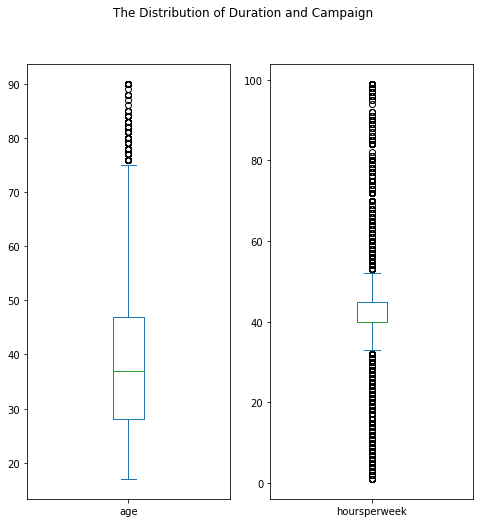

In [13]:
# Change the unit of 'duration' from seconds to minutes
df1 = raw_data.copy()
df1[['age','hoursperweek']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

[Table of Contents](#0.1)

### 3.3 Now let's look how numerical columns affect Salary. <a class="anchor" id="3.3"></a>

In [18]:
#age and salary

b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<AxesSubplot:title={'center':'Age and Salary statistics'}>

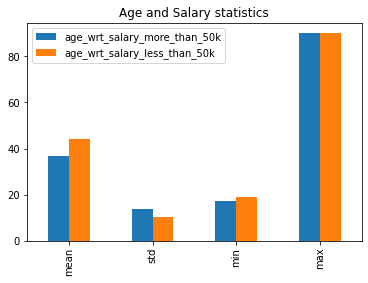

In [19]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [21]:
#capitalgain and salary

a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<AxesSubplot:title={'center':'Capital Gain and Salary statistics'}>

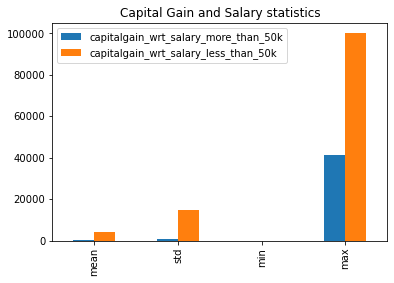

In [27]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [24]:
#capitalloss and deposit
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<AxesSubplot:title={'center':'Capital Loss and Salary statistics'}>

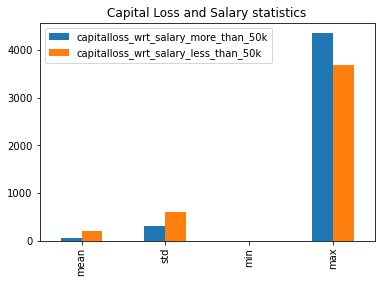

In [28]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

In [29]:
#hoursperweek and deposit
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<AxesSubplot:title={'center':'Working Hours per Week and Salary statistics'}>

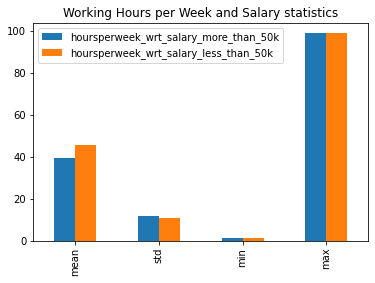

In [30]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

#### [Table of Contents](#0.1)

### 3.4 Categorical Variables<a class="anchor" id="3.4"></a>

In [8]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [32]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [35]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

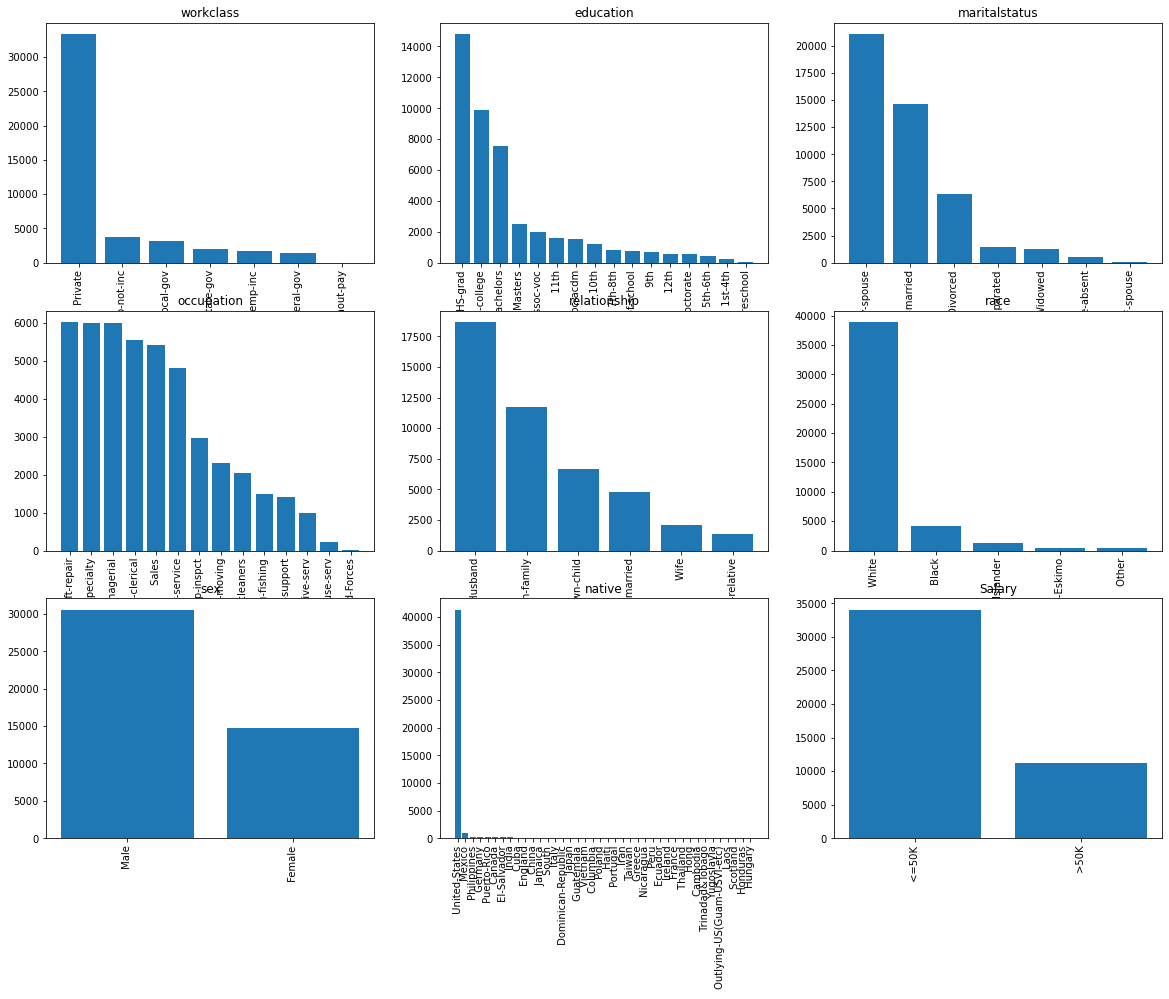

In [36]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

[Table of Contents](#0.1)

### 3.5 Bar plot for all categorical variables in the dataset<a class="anchor" id="3.5"></a>

Text(0.5, 1.0, 'Working Class')

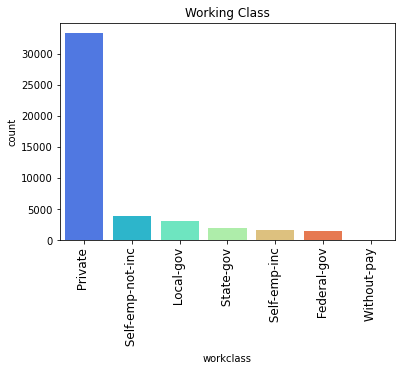

In [39]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

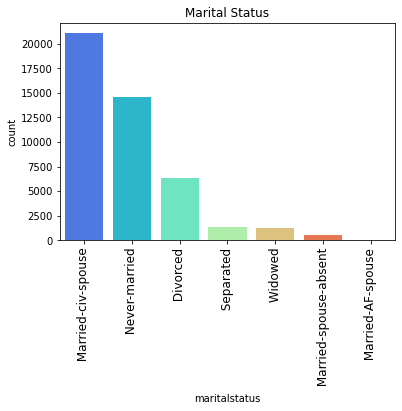

In [44]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

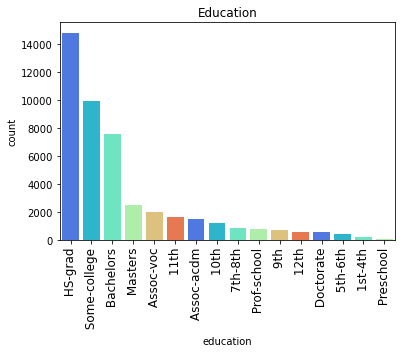

In [42]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

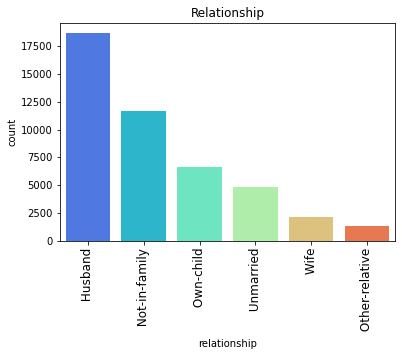

In [46]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

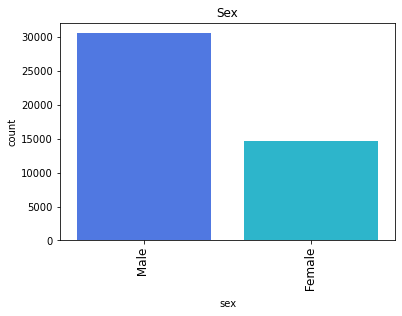

In [51]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

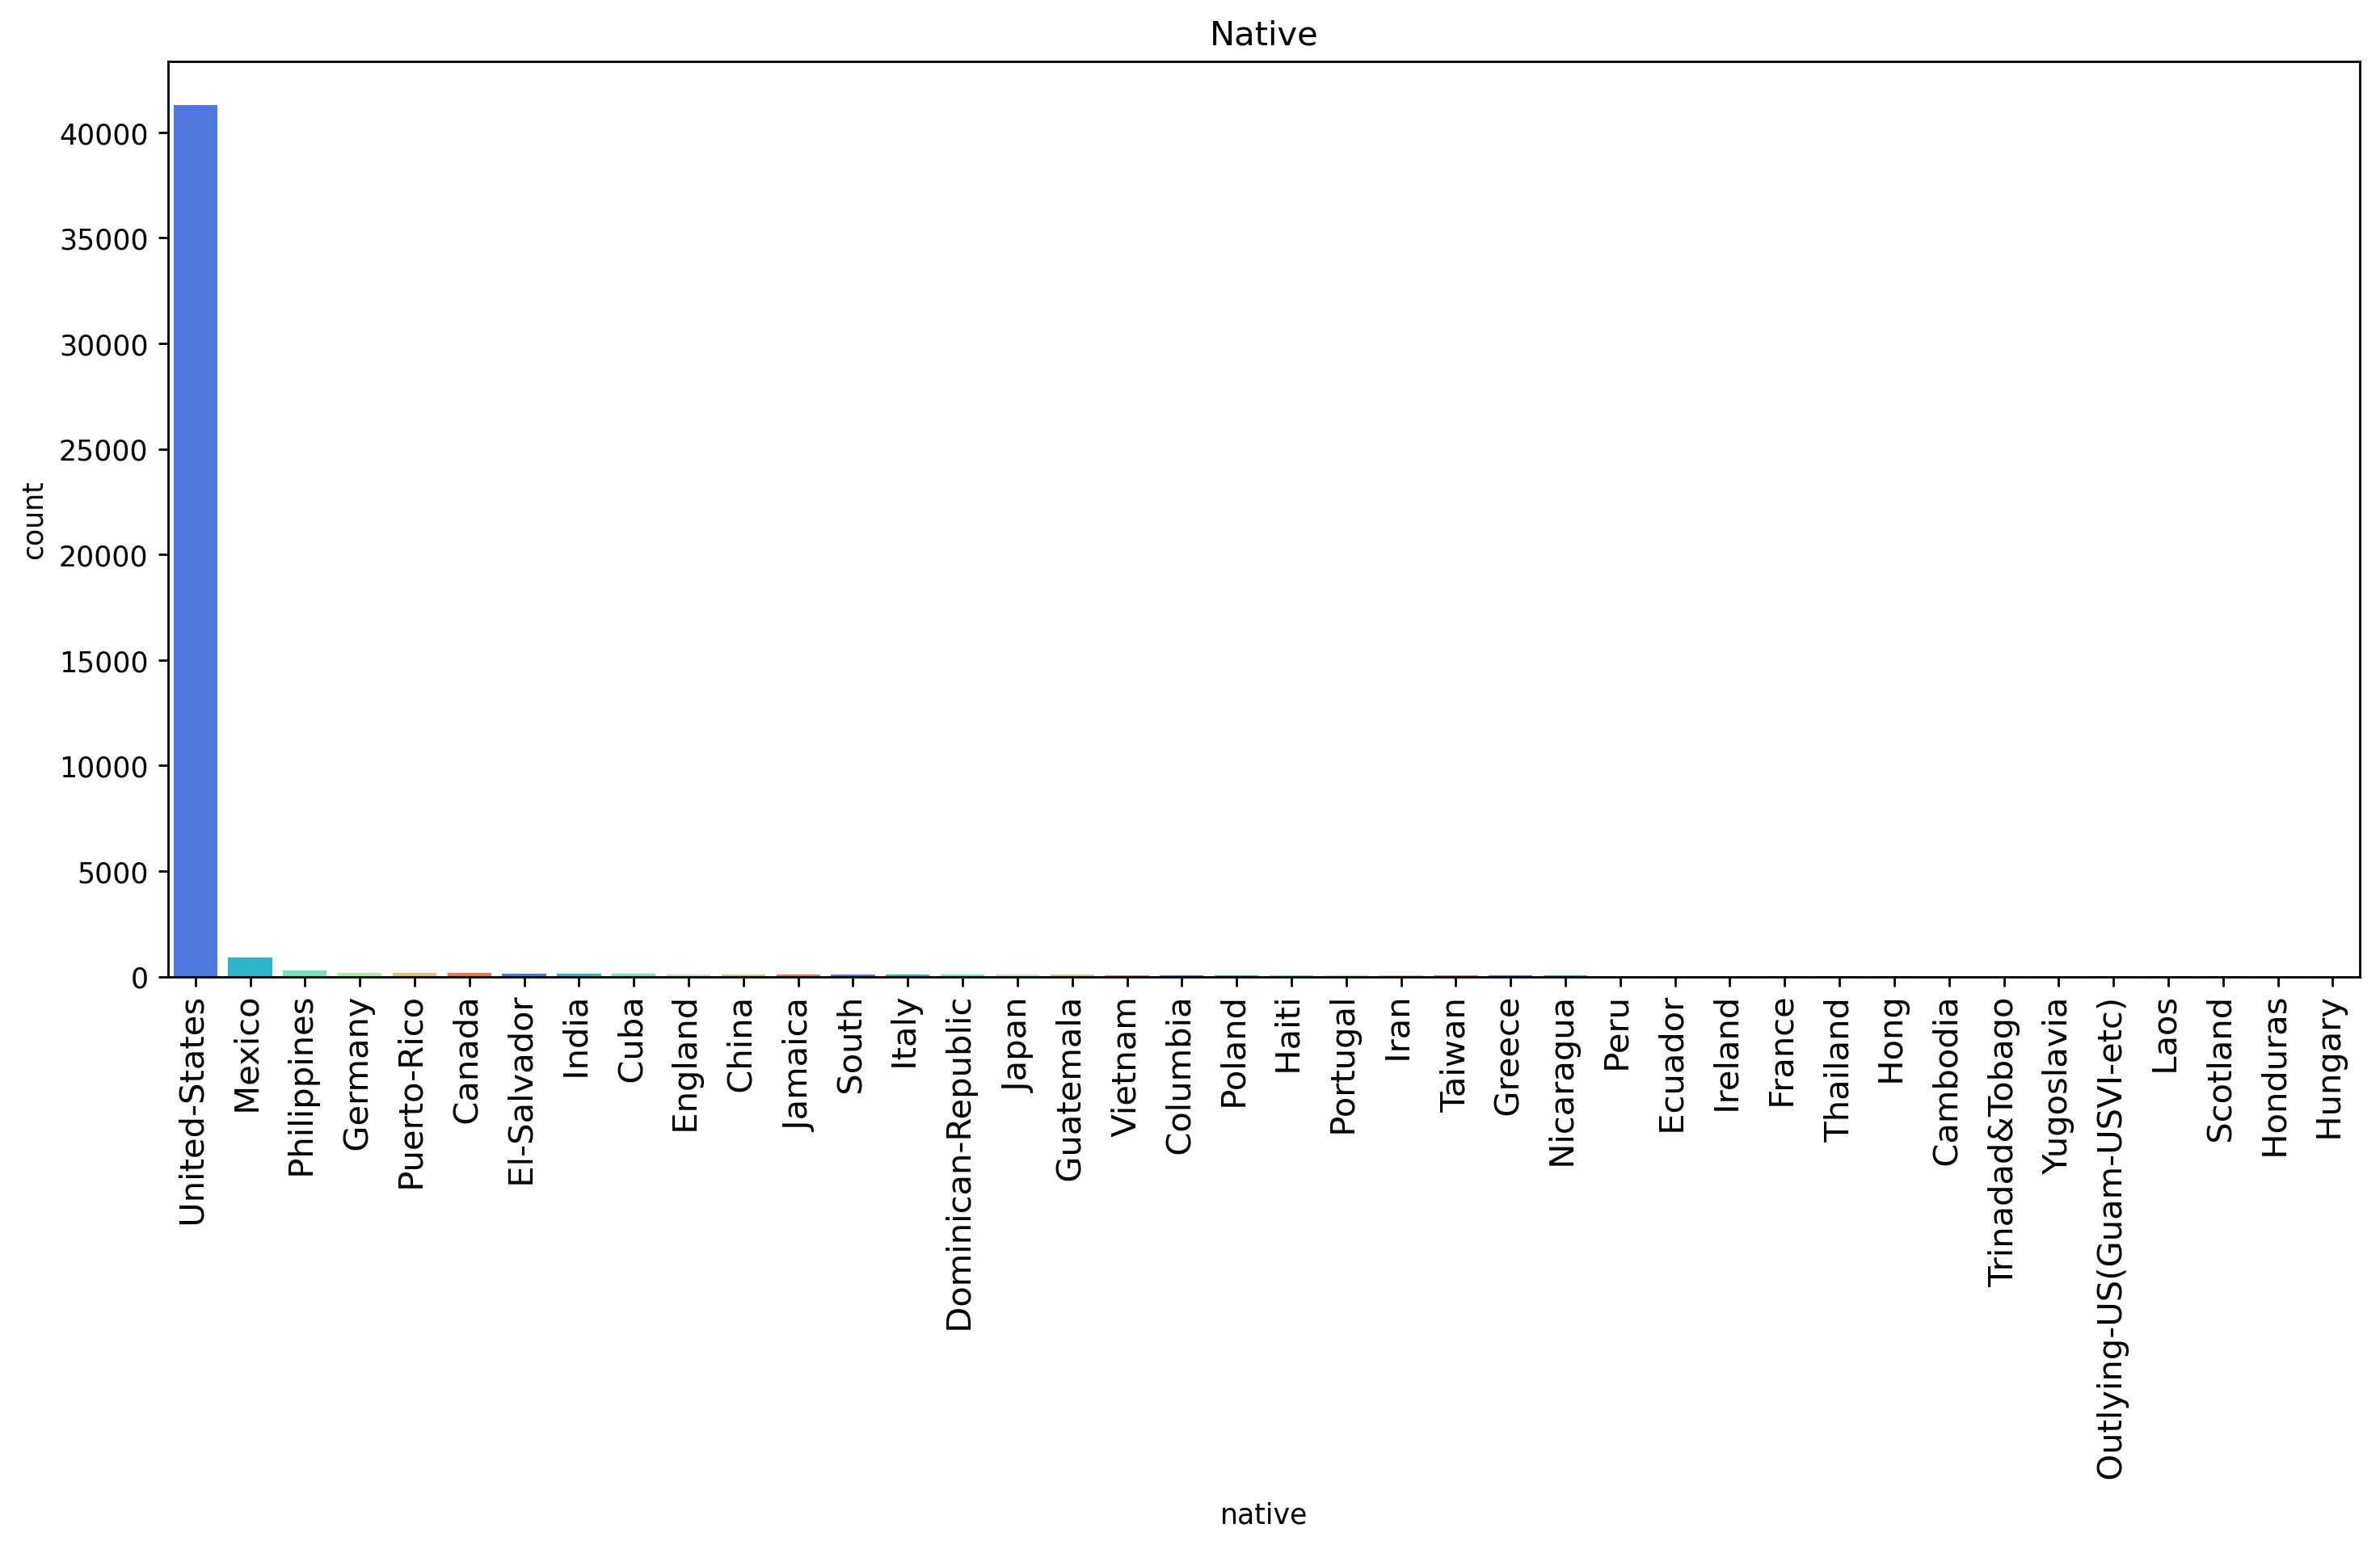

In [54]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal, 
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

### [Table of Contents](#0.1)

### 3.6 Analysis of the response column<a class="anchor" id="3.6"></a>
It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'Salary' column and compare its values to other columns.
First of all we should look at the number of Employees with salary '<=50K' and '>50K' in the Dependent column 'Salary'.

#### Checking for Imbalanced or balanced dataset with regards to the Target

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “<=50K” is called the majority class, and the much smaller in size “>50K” class is called the minority class.

In [7]:
countlessthanfiftyk = len(raw_data[raw_data.Salary == ' <=50K'])
countgreatthanfiftyk = len(raw_data[raw_data.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / (len(raw_data.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / (len(raw_data.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [6]:
raw_data.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary')

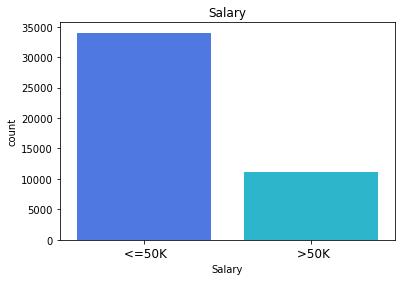

In [56]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=raw_data, palette = pal, 
              order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

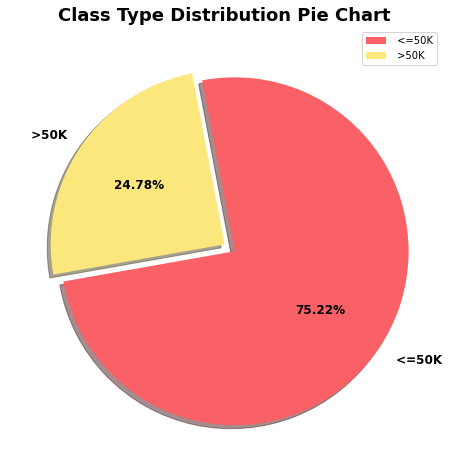

In [56]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

#### [Table of Contents](#0.1)

## 4. Data Visualization<a class="anchor" id="4"></a>

#### Analyzing the relationship of categorical features with respect to the Target feature

#### Bivariate Analysis

<AxesSubplot:>

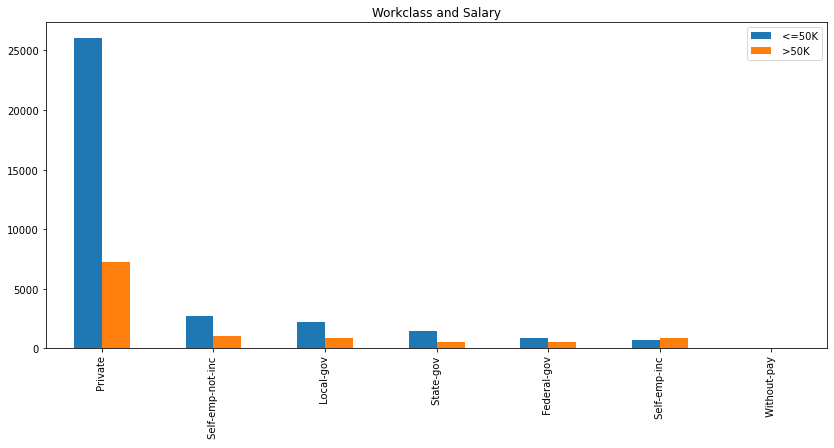

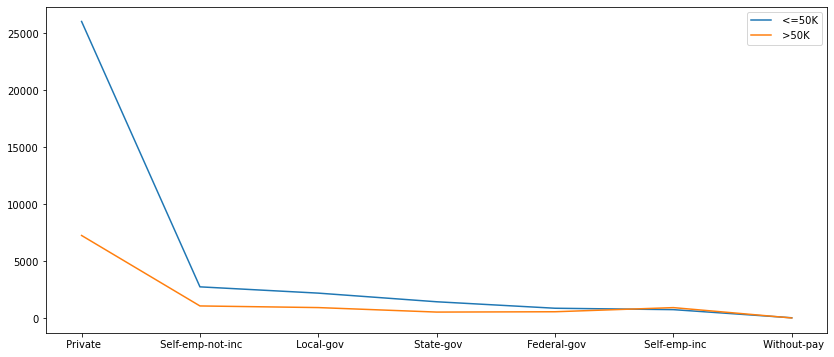

In [17]:
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='workclass'>

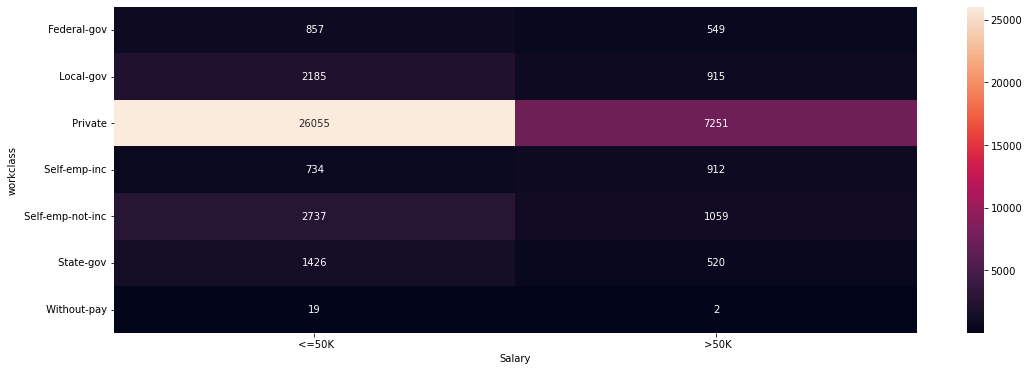

In [11]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

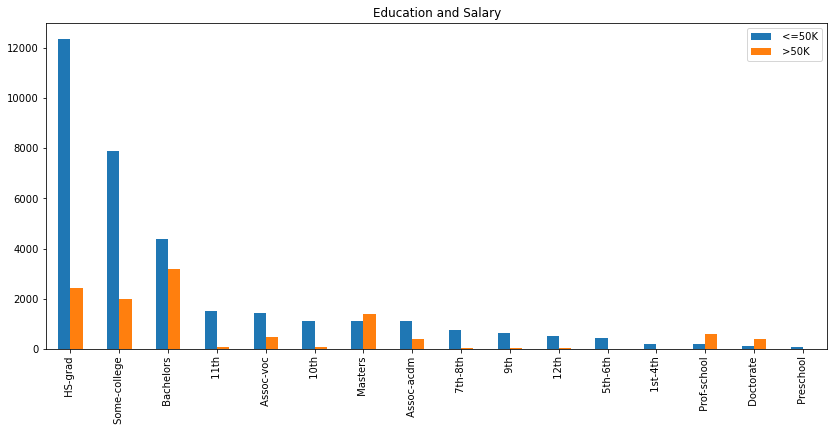

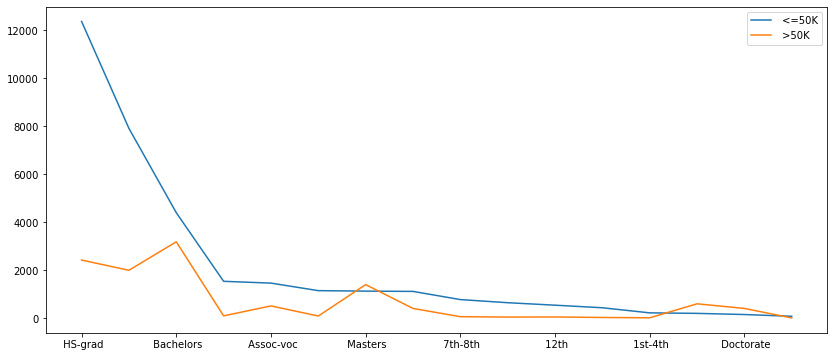

In [18]:
#Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='education'>

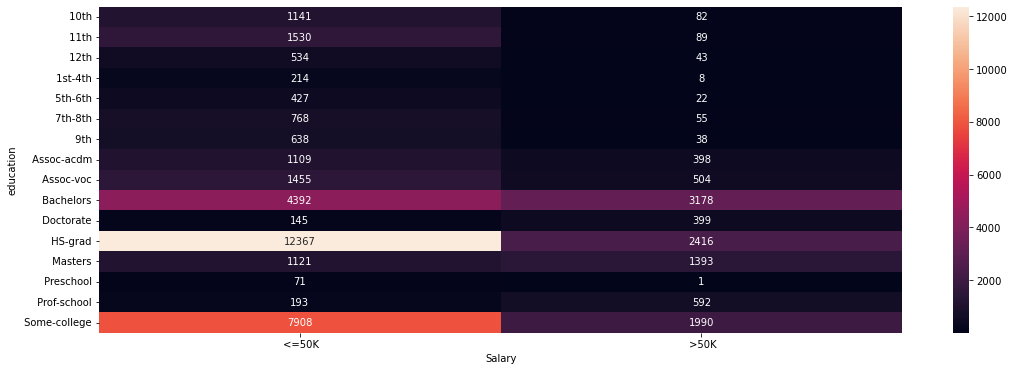

In [21]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

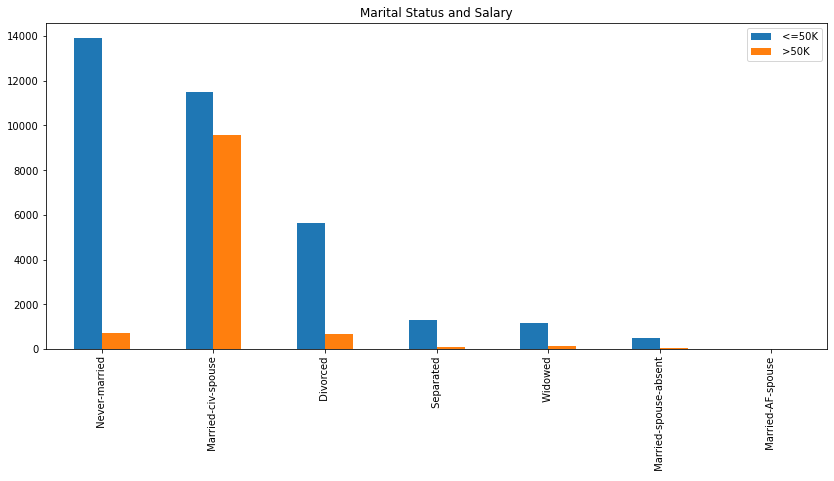

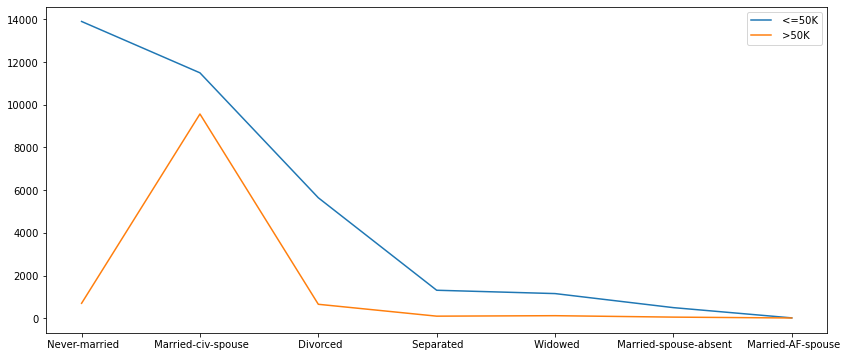

In [22]:
#maritalstatus and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

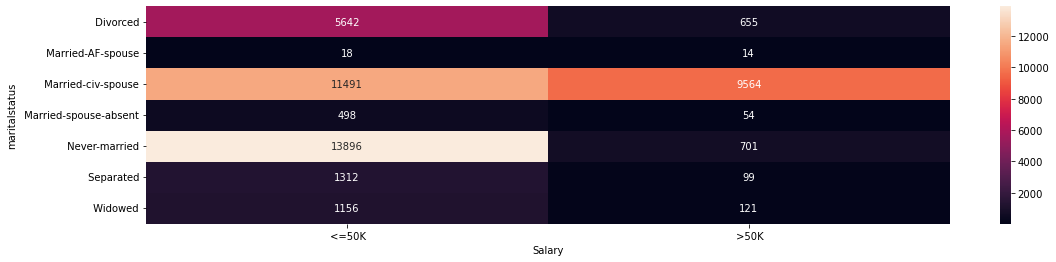

In [25]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['maritalstatus'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

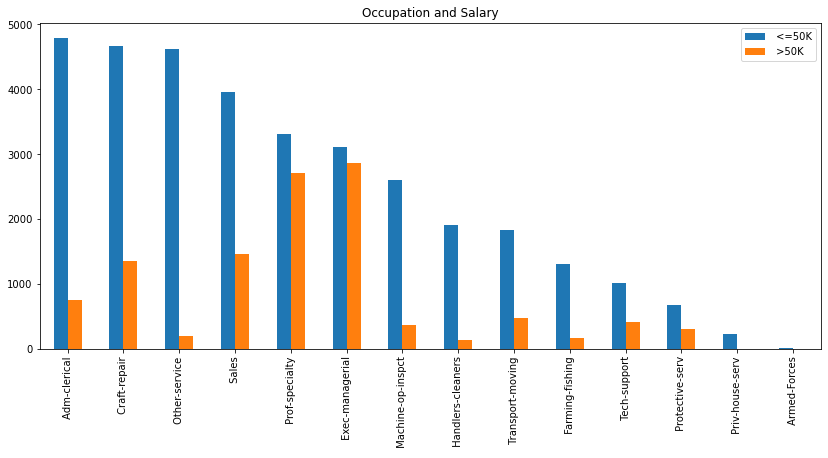

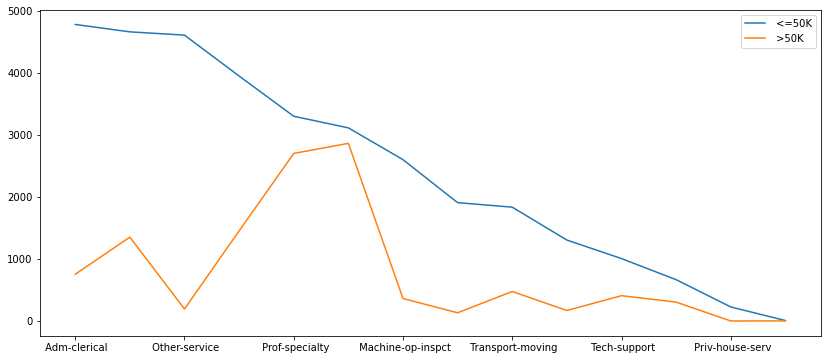

In [26]:
#occupation and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

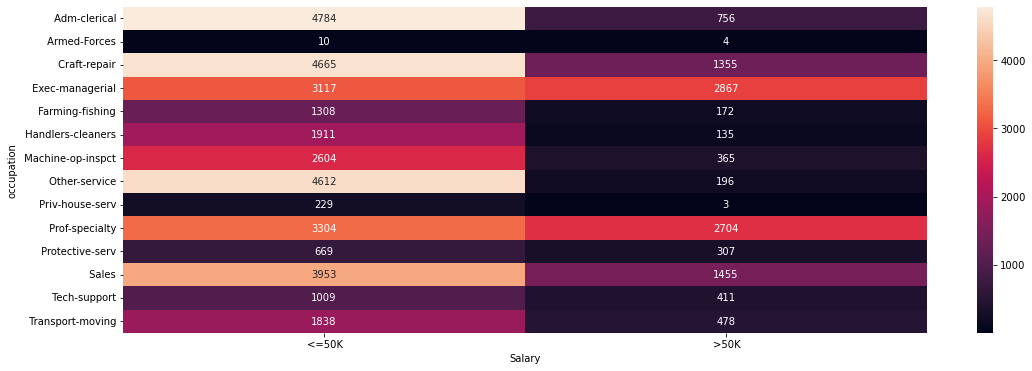

In [28]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['occupation'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

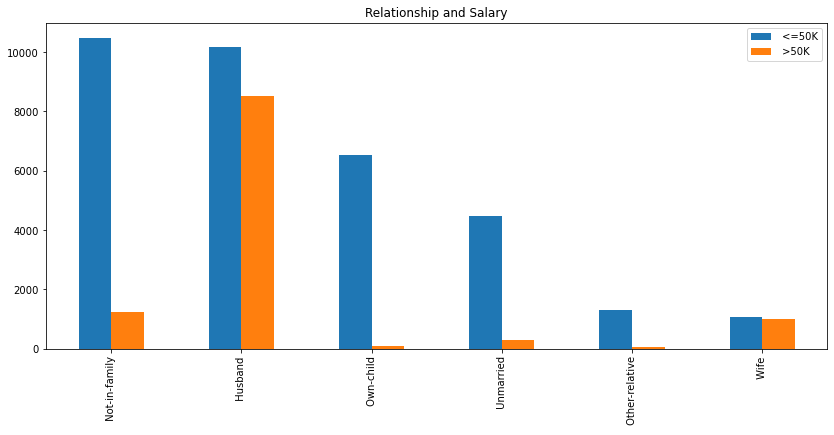

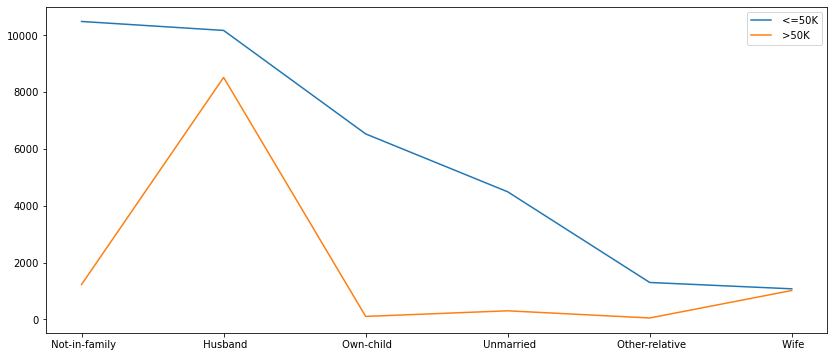

In [29]:
#relationship and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='relationship'>

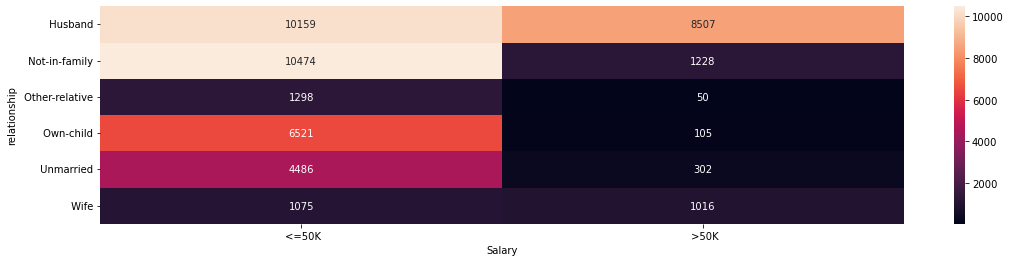

In [31]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['relationship'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

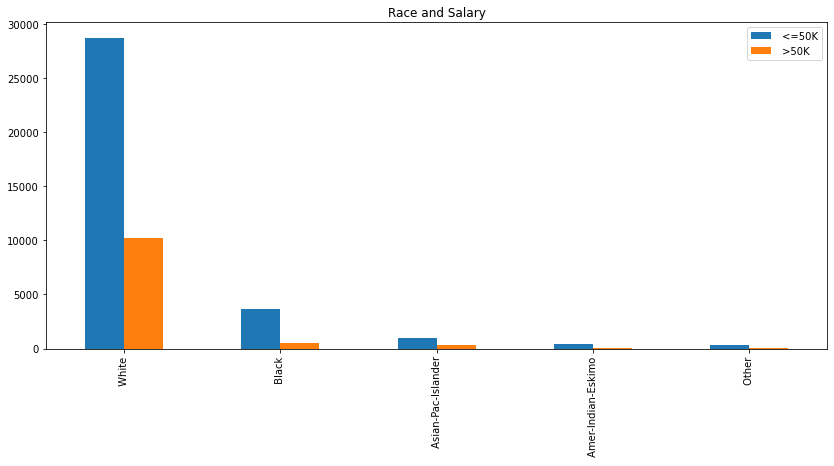

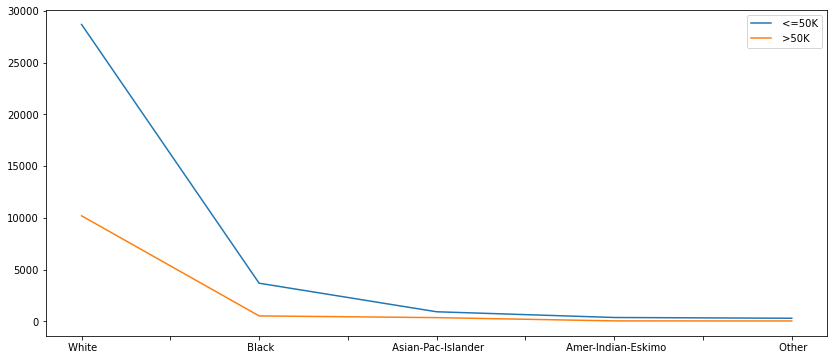

In [32]:
#Race and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='race'>

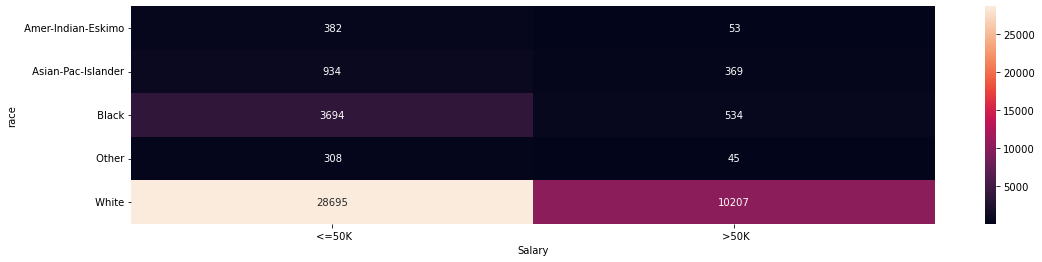

In [34]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['race'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

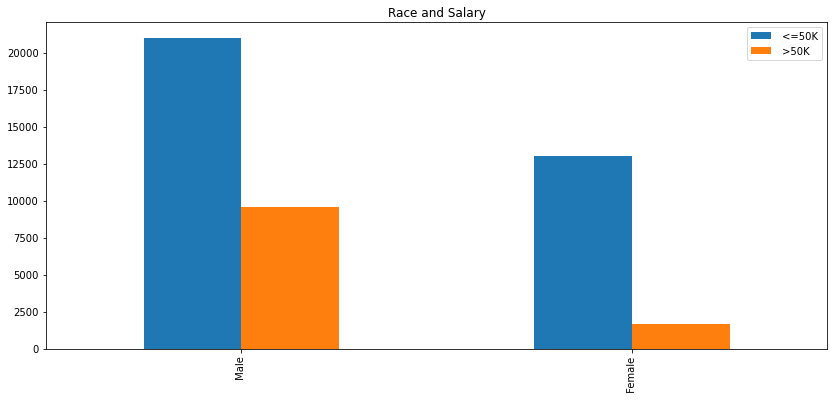

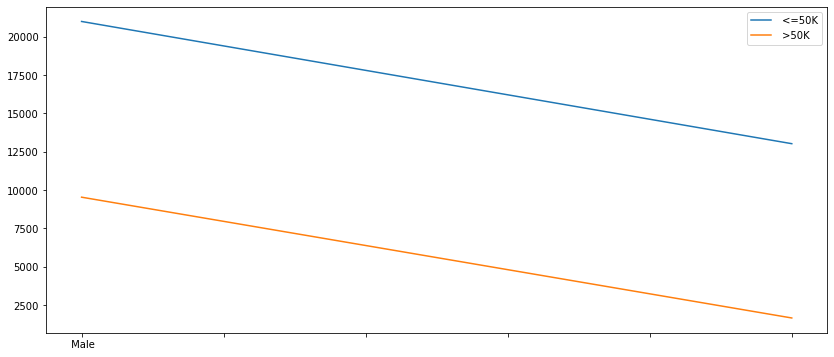

In [35]:
#Sex and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='sex'>

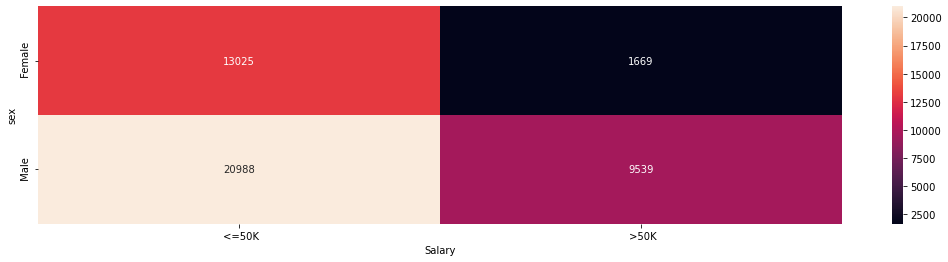

In [36]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['sex'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

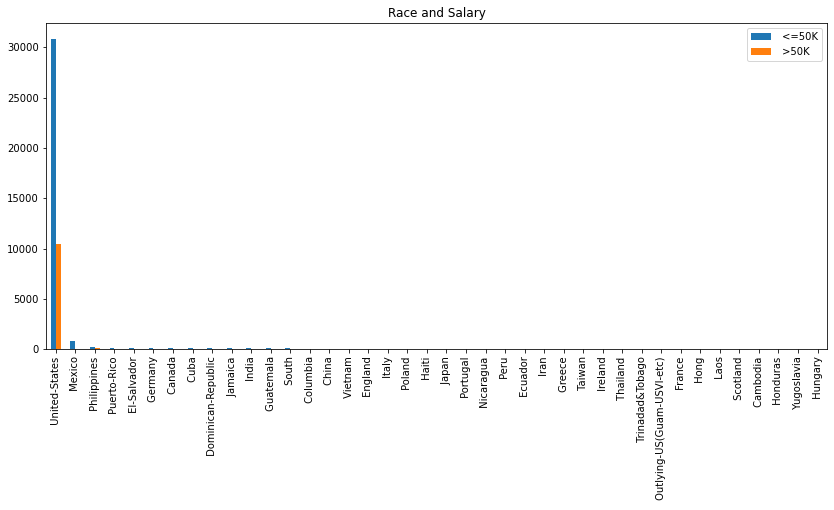

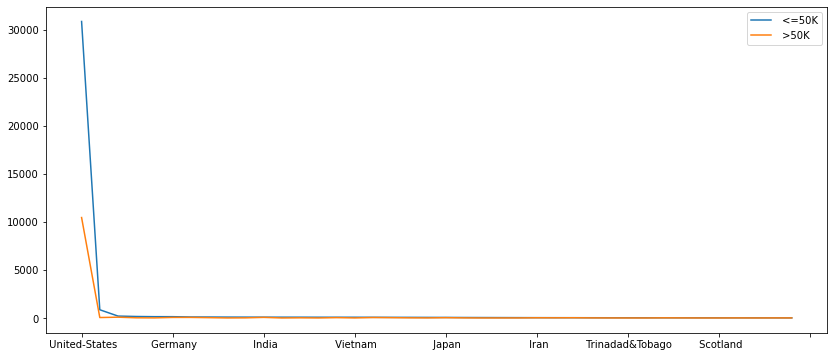

In [37]:
#Native and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='native'>

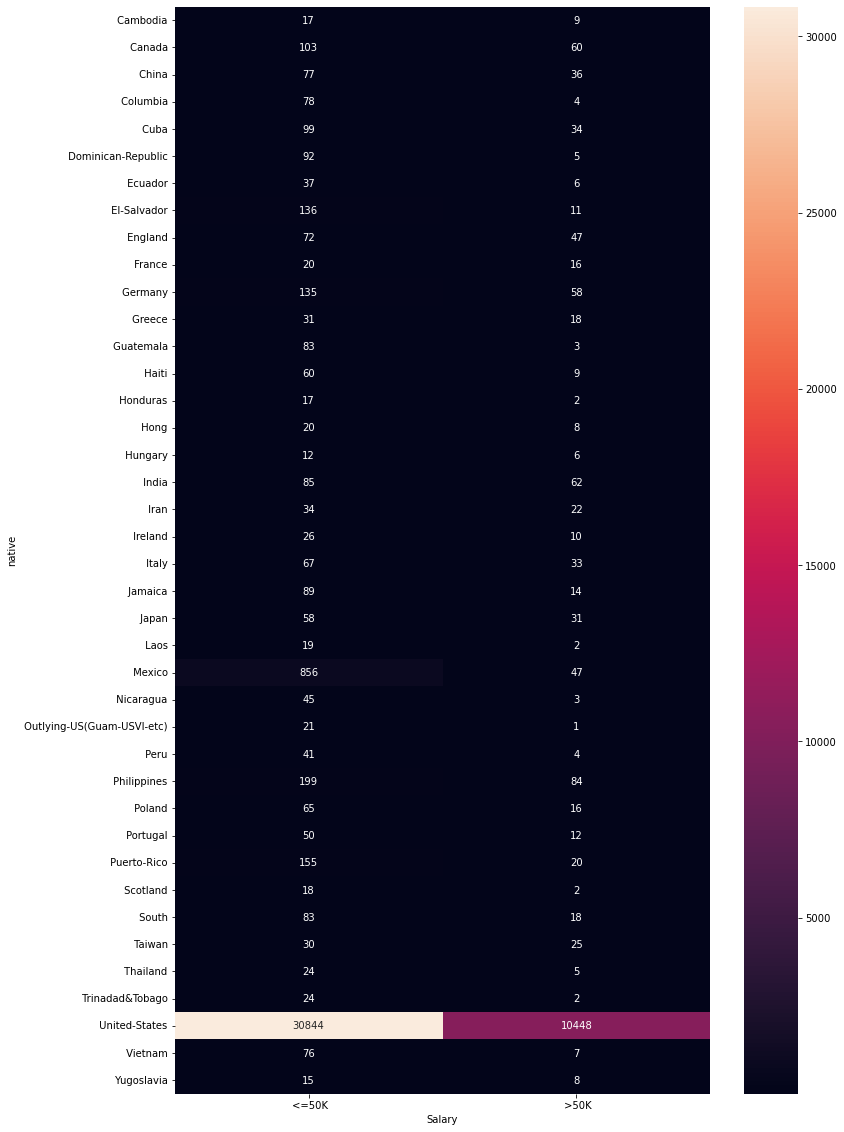

In [45]:
fig= plt.figure(figsize=(12, 20))
sns.heatmap(pd.crosstab(index=raw_data['native'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

Regarding the diagrams we can tell that according to our dataset:

Employees living in 'United States' and 'White' 'Male' and 'Husbands' are majority in getting salary more than 50k

#### [Table of Contents](#0.1)

### 4.1 Analyzing Relation by plotting Continuous features with the Target Feature<a class="anchor" id="4.1"></a>

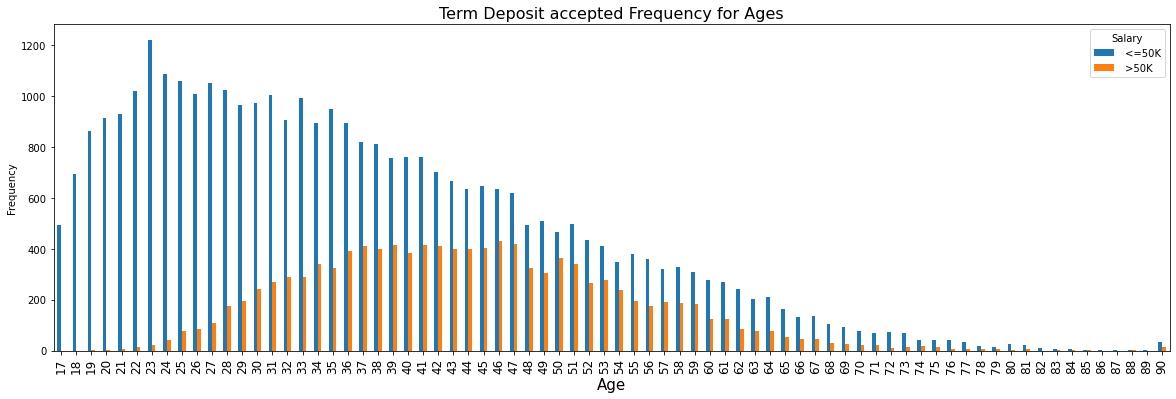

In [46]:
pd.crosstab(raw_data.age,raw_data.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

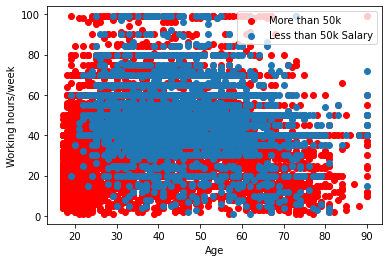

In [48]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

#### [Table of Contents](#0.1)

### 4.2 Visualize the Salary and Employee rate by age <a class="anchor" id="4.2"></a>

In [51]:
raw_data.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

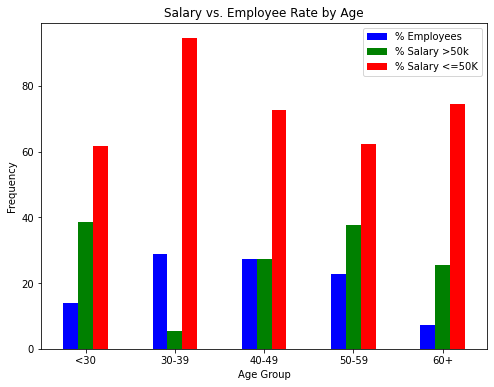

In [9]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()

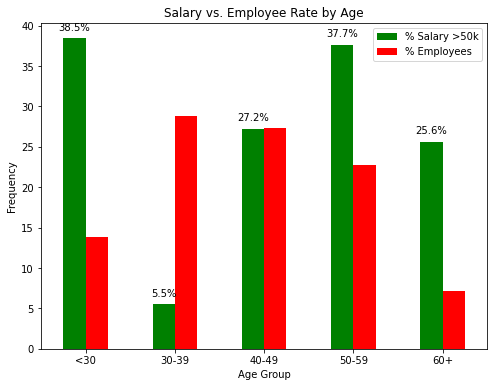

In [10]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

+ Insights: The youngest and the oldest instead of the middle-aged are having salary more then 50k

Green vertical bars indicate that Employee's with a age of <30 have the maximum number of frequecy for salary more than 50k. About 38% of the subscriptions came from the clients aged between <30 years Age group. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

### 4.3 Visualize the Salary for >50k by working hours per week <a class="anchor" id="4.3"></a>

In [12]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

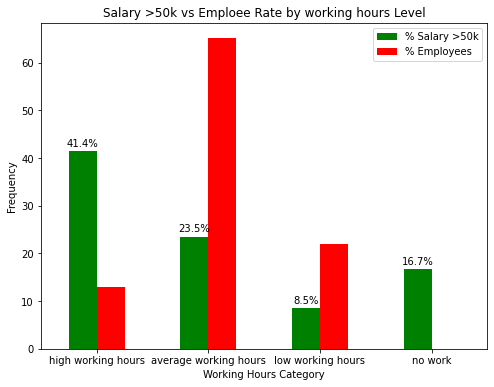

In [17]:
lst = [raw_data]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 50), 'hour_group'] = 'high working hours'
    
count_balance_response_pct = pd.crosstab(raw_data['Salary'],raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.drop('hour_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Insights: Employees who work more than or equal to average amount of hours per week tends to have salary more than 50k

To identify the trend more easily, Employees are categorized into four groups based on their levels of Hours worked per week:

+ No Work: employees with less than 1 hour of working hours per weeek.
+ Low working hours: employees who work less than the average working hours
+ Average Balance: employees who has been working on an average hours.
+ High Balance: employees who work more than the average working hours.

Unsurprisingly, this bar chart indicates a positive correlation between employees’ salary levels with respect to the working hours.

[Table of Content](#0.1)

### 4.4 Visualize the Salary rate by Workclass<a class="anchor" id="4.4"></a>

In [19]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [20]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


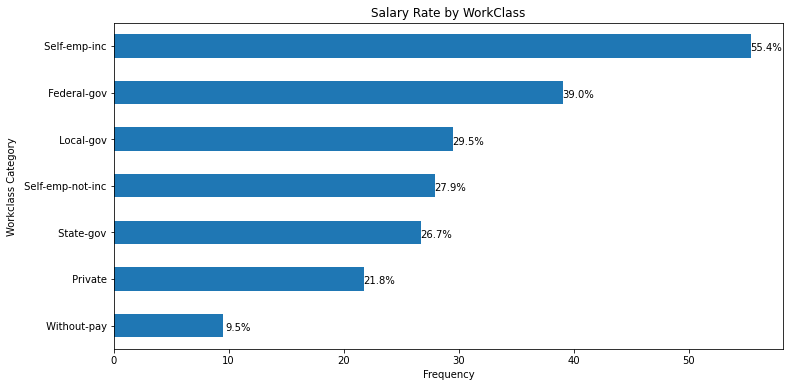

In [28]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### 4.5 Visualize the Salary rate by Education<a class="anchor" id="4.5"></a>

In [29]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [30]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


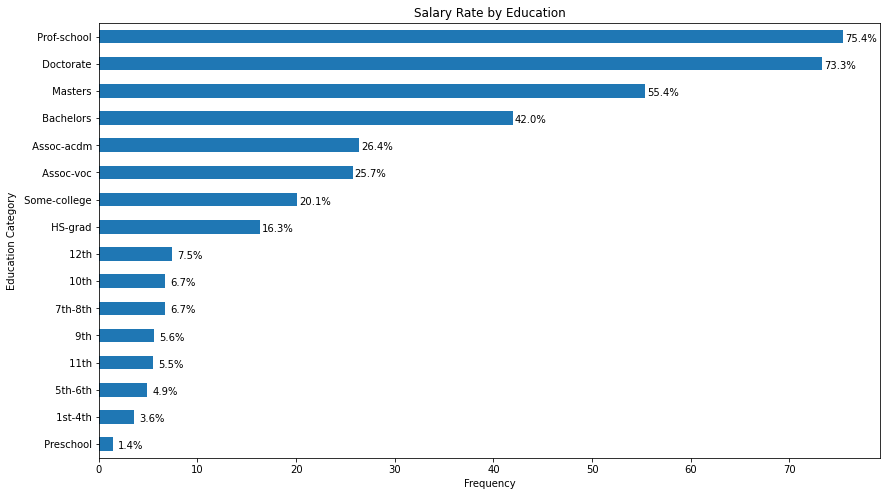

In [40]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

#### [Table of Content](#0.1)

## 5. Clean the dataset <a class="anchor" id="5"></a>
#### Deal with missing data 
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

![FilterMethods](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

### 5.1. Data Pre-Processing<a class="anchor" id="5.1"></a>

In [40]:
raw_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
data_ = raw_data.copy()
data_.drop('Salary',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data_['Salary'] = raw_data.Salary
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Salary"])
data_["Salary"]=le.transform(data_["Salary"])
data_.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### [Table of Content](#0.1)

### 5.2 Label Encoding Technique<a class="anchor" id="5.2"></a>

In [20]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= raw_data.copy()
# Encode labels in column 'species'.
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
#df["Salary"]=label_encoder.fit_transform(df["Salary"])

df.head(10)

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


### 5.3 Test Train Split With Imbalanced Dataset<a class="anchor" id="5.3"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)



In [21]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [22]:
y.unique()

array([0, 1])

In [33]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [51]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [52]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 14)
Shape of X_test:  (13567, 14)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


## 6. ***About Stratify*** :<a class="anchor" id="6"></a> 
+ Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model. 
The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

What are random sampling and Stratified sampling? 
Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling.
But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning? 
Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

Random sampling: 
If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling: 
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

What is the solution to mentioned problems? 
The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling.
The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

What is Stratified K-Fold Cross Validation? 
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

[Table of Contents](#0.1)

### 6.1. Grid search using Stratified Kfold Splits on Imbalanced Dataset<a class="anchor" id="6.1"></a> 

In [12]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [29]:
from sklearn.naive_bayes import MultinomialNB

rf_clf = MultinomialNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 77.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.792398      0.628307  0.776702      0.710353      0.751729
recall         0.952731      0.242490  0.776702      0.597611      0.776702
f1-score       0.865199      0.349928  0.776702      0.607564      0.737492
support    30612.000000  10087.000000  0.776702  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29165  1447]
 [ 7641  2446]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.795482     0.641425  0.780186     0.718454      0.757292
recall        0.952661     0.256913  0.780186     0.604787      0.780186
f1-score      0.867006     0.366879  0.780186     0.616942      0.743025
support    34

In [13]:
from sklearn.naive_bayes import GaussianNB

rf_clf = GaussianNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 79.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.809949      0.676525  0.794098      0.743237      0.776881
recall         0.948909      0.324279  0.794098      0.636594      0.794098
f1-score       0.873939      0.438413  0.794098      0.656176      0.765997
support    30612.000000  10087.000000  0.794098  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29048  1564]
 [ 6816  3271]]

Test Result:
Accuracy Score: 79.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.813743     0.693989  0.799204     0.753866      0.784056
recall        0.950603     0.339875  0.799204     0.645239      0.799204
f1-score      0.876865     0.456287  0.799204     0.666576      0.772604
support    34

In [30]:
from sklearn.naive_bayes import CategoricalNB

rf_clf = CategoricalNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 88.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.922378      0.786936  0.889874      0.854657      0.888810
recall         0.932020      0.761971  0.889874      0.846995      0.889874
f1-score       0.927174      0.774252  0.889874      0.850713      0.889273
support    30612.000000  10087.000000  0.889874  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[28531  2081]
 [ 2401  7686]]

Test Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.899533     0.707650  0.852941     0.803591      0.851965
recall        0.905616     0.693131  0.852941     0.799374      0.852941
f1-score      0.902564     0.700315  0.852941     0.801440      0.852427
support    34

### 6.2 Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset<a class="anchor" id="6.2"></a> 

In [53]:
from sklearn.naive_bayes import MultinomialNB

rf_clf = MultinomialNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 77.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.792801     0.630471  0.777216      0.711636      0.752570
recall         0.952833     0.244232  0.777216      0.598532      0.777216
f1-score       0.865481     0.352076  0.777216      0.608779      0.738241
support    23809.000000  7845.000000  0.777216  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22686  1123]
 [ 5929  1916]]

Test Result:
Accuracy Score: 77.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.792165     0.629658  0.776738      0.710912      0.751883
recall         0.953254     0.241154  0.776738      0.597204      0.776738
f1-score       0.865276     0.348742  0.776738      0.607009      0.737237
support   

In [54]:
from sklearn.naive_bayes import GaussianNB

rf_clf = GaussianNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 79.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810780     0.679166  0.795034      0.744973      0.778161
recall         0.948969     0.327852  0.795034      0.638411      0.795034
f1-score       0.874448     0.442228  0.795034      0.658338      0.767329
support    23809.000000  7845.000000  0.795034  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22594  1215]
 [ 5273  2572]]

Test Result:
Accuracy Score: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.809552     0.680503  0.794428      0.745027      0.777563
recall         0.950216     0.321737  0.794428      0.635976      0.794428
f1-score       0.874262     0.436907  0.794428      0.655584      0.765850
support   

In [56]:
from sklearn.naive_bayes import CategoricalNB

rf_clf = CategoricalNB(alpha=1.0)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 88.92%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.917874     0.794621  0.889208      0.856248      0.887328
recall         0.936495     0.745698  0.889208      0.841096      0.889208
f1-score       0.927091     0.769383  0.889208      0.848237      0.888005
support    23809.000000  7845.000000  0.889208  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22297  1512]
 [ 1995  5850]]

Test Result:
Accuracy Score: 85.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.895309     0.718483  0.854058      0.806896      0.851477
recall         0.912681     0.676182  0.854058      0.794432      0.854058
f1-score       0.903911     0.696691  0.854058      0.800301      0.852546
support   

#### Observation: 
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.
+ #### As Categorical Naive Bayes is scoring better result than other models we are going to use this model for final model building

[Table of Contents](#0.1)

## 7. Handling imbalance data using SMOTE based techniques<a class="anchor" id="7"></a> 

#### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

+ ##### <b>SMOTE: Synthetic Minority Oversampling Technique</b>
+ SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

+ <b>Working Procedure</b>:
At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:
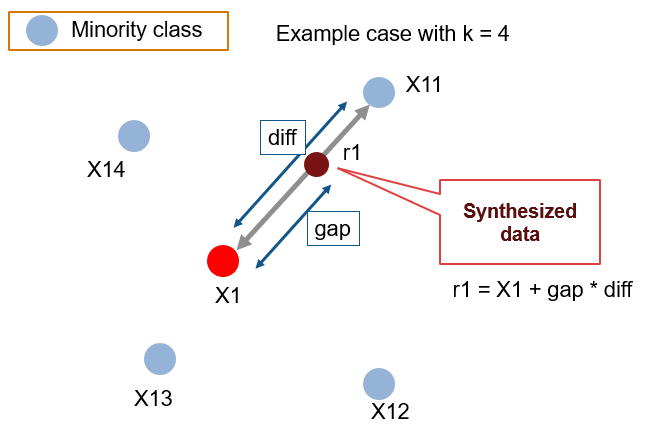


Though this algorithm is quite useful, it has few drawbacks associated with it.

+ i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

+ ii) SMOTE tends to create a large no. of noisy data points in feature space.

In [57]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [58]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 14)
Shape of X_test:  (13567, 14)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


### 7.1 SMOTE Oversampling technique<a class="anchor" id="7.1"></a> 

In [59]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23809, 1: 23809})


### 7.2 ADASYN: Adaptive Synthetic Sampling Approach<a class="anchor" id="7.2"></a> 
ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

<b>Working Procedure</b>:
From the dataset, the total no. of majority N– and minority N+ are captured respectively. Then we preset the threshold value, dth for the maximum degree of class imbalance. Total no. of synthetic samples to be generated, G = (N– – N+) x β. Here, β = (N+/ N–).\
For every minority sample xi, KNN’s are obtained using Euclidean distance, and ratio ri is calculated as Δi/k and further normalized as rx <= ri / ∑ rᵢ .\
Thereafter, the total synthetic samples for each xi will be, gi = rx x G. Now we iterate from 1 to gi to generate samples the same way as we did in SMOTE.\
The below-given diagram represents the above procedure:

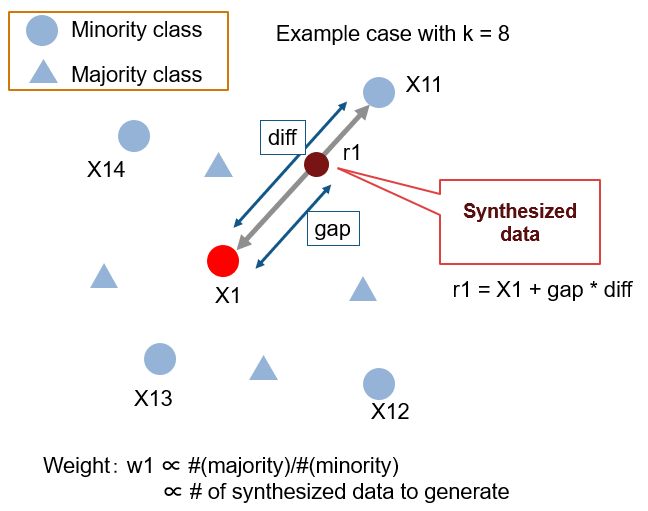

In [60]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23809, 1: 23490})


### 7.3 Hybridization: SMOTE + Tomek Links<a class="anchor" id="7.3"></a> 
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

[Table of Contents](#0.1)

In [61]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23044, 1: 23044})


### 7.4 Hybridization: SMOTE + ENN<a class="anchor" id="7.4"></a> 
SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

<b>Python Code for SMOTE + ENN algorithm:

In [62]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({1: 17640, 0: 11617})


##### The below-given picture shows how different SMOTE based resampling techniques work out to deal with imbalanced data.

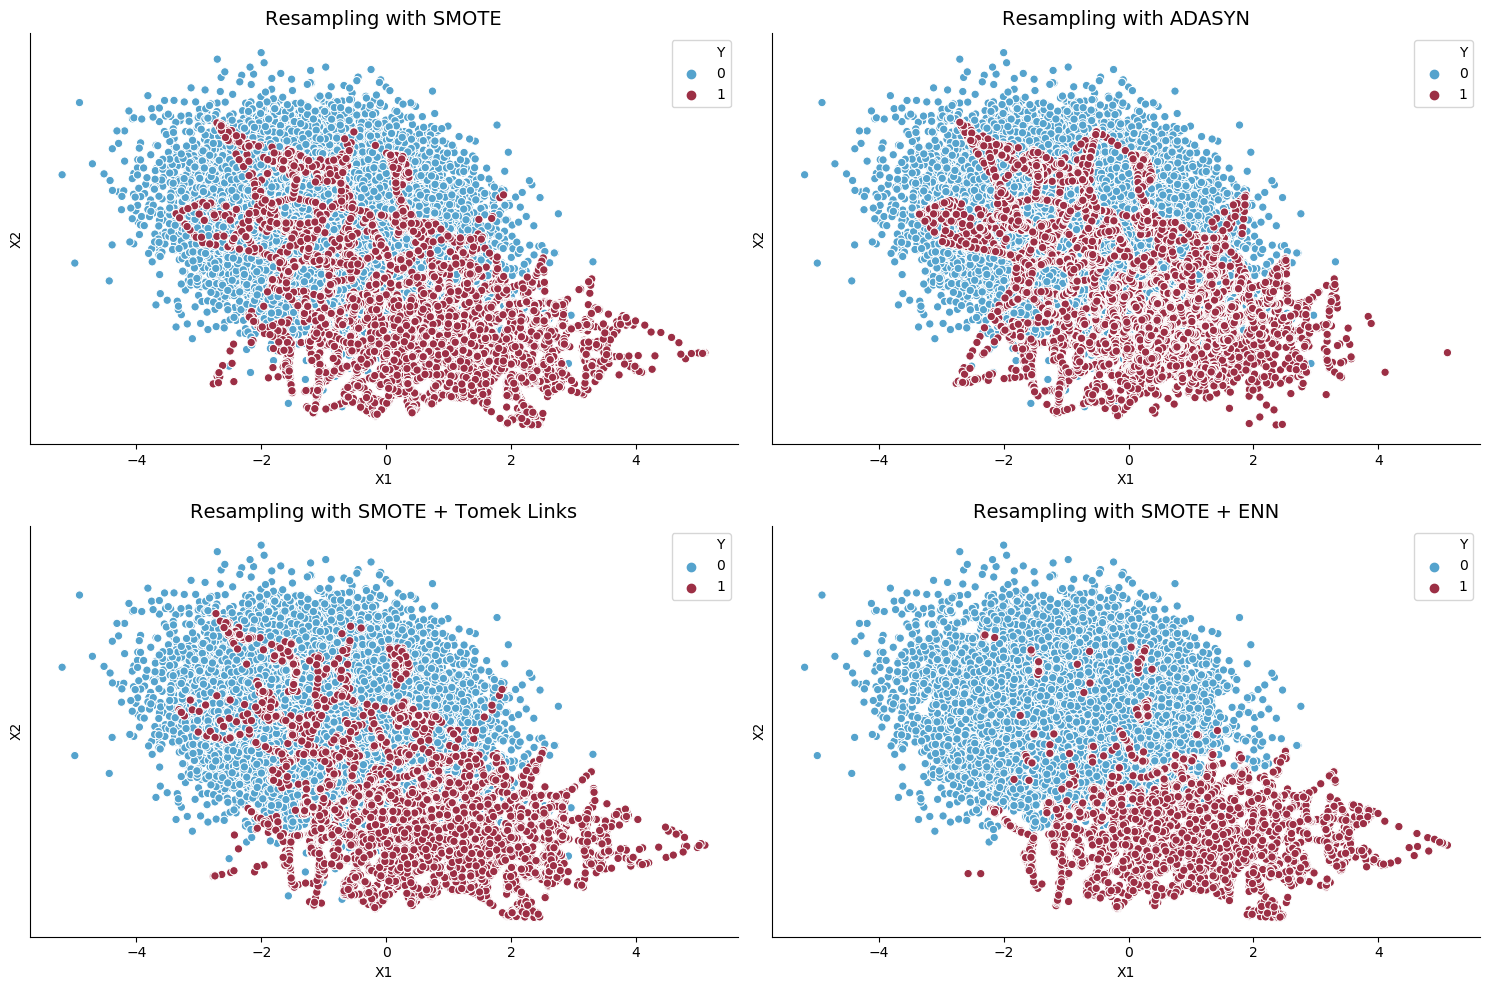

[Table of Contents](#0.1)

### 7.5 Performance Analysis after Resampling<a class="anchor" id="7.5"></a> 

In [63]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [64]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling

In [83]:
model_params = {

    'Gaussian-Naive-Bayes' : {
        'model' : GaussianNB(),
        'params' : {'var_smoothing': np.logspace(0,-9, num=100)}

         
    }
}

In [74]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with ACTUAL
Confusion Matrix
[[9667  537]
 [2304 1059]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10204
           1       0.66      0.31      0.43      3363

    accuracy                           0.79     13567
   macro avg       0.74      0.63      0.65     13567
weighted avg       0.77      0.79      0.76     13567
 

AUC-ROC
0.8546159097788988
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with SMOTE
Confusion Matrix
[[9566  638]
 [1983 1380]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     10204
           1       0.68      0.41      0.51      3363

    accuracy                           0.81     13567
   macro avg       0.76      0.67      0.70     13567
weighted avg       0.79      0.81      0.79     1

#### As the results can be compared, SMOTE_ENN technique gave the best results we are going to use it further 

In [88]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({1: 17712, 0: 11681})


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smenn,y_train_smenn,test_size=0.3,random_state=1, stratify=y_train_smenn)

counter = Counter(y_train_smenn)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 17712, 0: 11681})
After Counter({1: 12398, 0: 8177})
Shape of X_train:  (20575, 14)
Shape of X_test:  (8818, 14)
Shape of y_train:  (20575,)
Shape of y_test (8818,)


[Table of Contents](#0.1)

### 8. Machine Learning: Classification <a class="anchor" id="8"></a>

![FilterMethods](http://algolytics.com/wp-content/uploads/2018/08/Classification_model_construction.png)

### 8.1 Sklearn Naive Bayes Classifier<a class="anchor" id="8.1"></a>

**Naive Bayes algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**. 

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


#### **Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.

In [143]:
# instantiating the model
model = CategoricalNB()
model1 = MultinomialNB()
model2 = GaussianNB()

# fit the model
model.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

GaussianNB()

In [145]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

print('CategoricalNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

CategoricalNB Model accuracy score: 0.9083
MultinomialNB Model accuracy score: 0.5700
GaussianNB Model accuracy score: 0.7406


In [146]:
# print the classification report

print('CategoricalNB Model',report(y_test, y_pred))
print('MultinomialNB Model',report(y_test, y_pred1))
print('GaussianNB Model',report(y_test, y_pred2))

CategoricalNB Model               precision    recall  f1-score   support

           0       0.93      0.83      0.88      3504
           1       0.90      0.96      0.93      5314

    accuracy                           0.91      8818
   macro avg       0.91      0.90      0.90      8818
weighted avg       0.91      0.91      0.91      8818

MultinomialNB Model               precision    recall  f1-score   support

           0       0.48      0.95      0.64      3504
           1       0.91      0.32      0.47      5314

    accuracy                           0.57      8818
   macro avg       0.70      0.64      0.55      8818
weighted avg       0.74      0.57      0.54      8818

GaussianNB Model               precision    recall  f1-score   support

           0       0.61      0.95      0.74      3504
           1       0.95      0.60      0.74      5314

    accuracy                           0.74      8818
   macro avg       0.78      0.78      0.74      8818
weighted avg     

#### Categorical Naive Bayes scored better accuracy, F1 score, precision and Receall for both Binary outputs. Hence, we are going to continue using the Categorical Model for further Metrics

### Compare the train-set and test-set accuracy 
Now, I will compare the train-set and test-set accuracy to check for overfitting.

#### Check for overfitting and underfitting 


In [99]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 92.70%
Test set score: 90.83%


##### The training-set accuracy score is 0.9270 while the test-set accuracy to be 0.9083. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy 
So, the model accuracy is 89.71%. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [100]:
# check class distribution in test set

y_test.value_counts()

1    5314
0    3504
Name: Salary, dtype: int64

calculate the percentage of ones
because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

In [101]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.6026309820821047 
 Percentage of 1's 60.0 %


In [102]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.39736901791789525 
 Percentage of 0's 40.0 %


In [103]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

1    0.602631
Name: Salary, dtype: float64

This means that a dumb model that always predicts 0 would be right 60% of the time

+ This shows how classification accuracy is not that good as it's close to a dumb model
+ It's a good way to know the minimum we should achieve with our models

<b> Conclusion:

+ Classification accuracy is the easiest classification metric to understand
    + But, it does not tell you the underlying distribution of response values
+ We examine by calculating the null accuracy And, it does not tell you what "types" of errors your classifier is making

### 8.2 Confusion matrix<a class="anchor" id="8.2"></a>
Table that describes the performance of a classification model

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [104]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = model.predict(x_test)

print(cm(y_test, y_predict))

[[2921  583]
 [ 226 5088]]


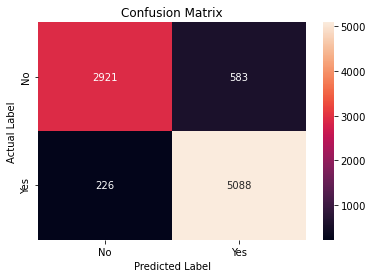

In [105]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

<b>Basic terminology

+ True Positives (TP): we correctly predicted that they do have Salary >50k
    + 5088
+ True Negatives (TN): we correctly predicted that they don't have Salary >50k
    + 2921
+ False Positives (FP): we incorrectly predicted that they do have Salary >50k (a "Type I error")
    + 226
    + Falsely predict positive
    + Type I error
+ False Negatives (FN): we incorrectly predicted that they don't have Salary >50k (a "Type II error")
    + 583
    + Falsely predict negative
    + Type II error

In [108]:
# save confusion matrix and slice into four pieces
confusion = cm(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[2921  583]
 [ 226 5088]]


### Metrics computed from a confusion matrix
Classification Accuracy: Overall, how often is the classifier correct?

In [109]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.9082558403266047
0.9082558403266047


### Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [110]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))

0.09174415967339533
0.09174415967339533


<b>Recall</b>: When the actual value is positive, how often is the prediction correct?

+ Something we want to maximize
+ How "sensitive" is the classifier to detecting positive instances?
+ Also known as "True Positive Rate" or "Sensitivity"
+ TP / all positive
    + all positive = TP + FN

In [111]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.9574708317651487
0.9574708317651487


<b>Specificity</b>: When the actual value is negative, how often is the prediction correct?

+ Something we want to maximize
+ How "specific" (or "selective") is the classifier in predicting positive instances?
+ TN / all negative
    + all negative = TN + FP

In [112]:
specificity = TN / (TN + FP)

print(specificity)

0.8336187214611872


Our classifier

+ Highly specific
+ Not sensitive

<b>False Positive Rate</b>: When the actual value is negative, how often is the prediction incorrect?

In [113]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1663812785388128
0.1663812785388128


<b>Precision</b>: When a positive value is predicted, how often is the prediction correct?

+ How "precise" is the classifier when predicting positive instances?

In [114]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

0.897196261682243
0.897196261682243


<b>f1-score 
    
+ f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [115]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

0.9263541192535275

### The threshold level 

In [116]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model.predict_proba(x_test)[0:10]

y_pred_prob

array([[1.70510730e-03, 9.98294893e-01],
       [9.83924646e-01, 1.60753543e-02],
       [9.99999963e-01, 3.66059879e-08],
       [1.10206506e-03, 9.98897935e-01],
       [1.03717167e-03, 9.98962828e-01],
       [6.89858691e-02, 9.31014131e-01],
       [8.48476352e-04, 9.99151524e-01],
       [1.18911738e-05, 9.99988109e-01],
       [3.81001027e-02, 9.61899897e-01],
       [4.86153777e-04, 9.99513846e-01]])

#### Observations
+ In each row, the numbers sum to 1.
+ There are 2 columns which correspond to 2 classes - 0 and 1.

    + Class 0 - predicted probability that there is no Subscription.

    + Class 1 - predicted probability that there is Subscriptionw.

+ Importance of predicted probabilities

    + We can rank the observations by probability of Subscription or no Subscription.
+ predict_proba process

    + Predicts the probabilities

    + Choose the class with the highest probability

+ Classification threshold level

    + There is a classification threshold level of 0.5.

    + Class 1 - probability of Subscription is predicted if probability > 0.5.

    + Class 0 - probability of no Subscription is predicted if probability < 0.5.

In [118]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Salary <=50k (0)', 'Prob of - Salary >50k (1)'])

y_pred_prob_df

,Prob of - Salary <=50k (0),Prob of - Salary >50k (1)
0,0.001705,9.982949e-01
1,0.983925,1.607535e-02
2,1.000000,3.660599e-08
3,0.001102,9.988979e-01
4,0.001037,9.989628e-01
5,0.068986,9.310141e-01
6,0.000848,9.991515e-01
7,0.000012,9.999881e-01
8,0.038100,9.618999e-01
9,0.000486,9.995138e-01


Text(0, 0.5, 'Frequency')

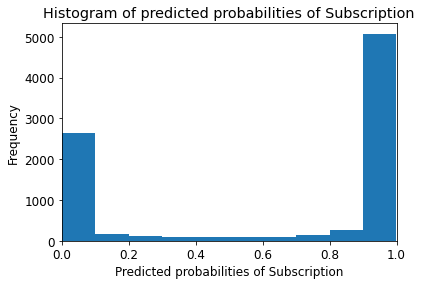

In [119]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

#### Observations
+ We can see that the above histogram is highly positive skewed.
+ The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.
+ There are relatively small number of observations with probability > 0.5.
+ So, these small number of observations predict that the salaries will be >50K.
+ Majority of observations predcit that the salaries will be <=50K.

### 8.3 Lower the Threshold<a class="anchor" id="8.3"></a>

In [121]:
from sklearn.preprocessing import binarize

for i in range(1,6):
    
    cm1=0
    
    y_pred1 = model.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[2559  945]
 [  88 5226]] 

 with 7785 correct predictions,  

 945 Type I errors( False Positives),  

 88 Type II errors( False Negatives),  

 Accuracy score:  0.8828532547062826 

 Sensitivity:  0.9834399698908544 

 Specificity:  0.7303082191780822 



With 0.2 threshold the Confusion Matrix is  

 [[2703  801]
 [ 121 5193]] 

 with 7896 correct predictions,  

 801 Type I errors( False Positives),  

 121 Type II errors( False Negatives),  

 Accuracy score:  0.8954411431163529 

 Sensitivity:  0.9772299585999247 

 Specificity:  0.771404109589041 



With 0.3 threshold the Confusion Matrix is  

 [[2794  710]
 [ 158 5156]] 

 with 7950 correct predictions,  

 710 Type I errors( False Positives),  

 158 Type II errors( False Negatives),  

 Accuracy score:  0.901564980721252 

 Sensitivity:  0.9702672186676703 

 Specificity:  0.7973744292237442 



With 0.4 threshold the Confusion Matrix is  

 [[2853  651]
 [ 190 5124]] 

 with 

#### Comments
+ In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
+ Threshold can be adjusted to increase sensitivity or specificity.
+ Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
+ We can see that increasing the threshold level results in increased accuracy.
+ Adjusting the threshold level should be one of the last step you do in the model-building process.

### 8.4 ROC - AUC <a class="anchor" id="8.4"></a>
#### ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

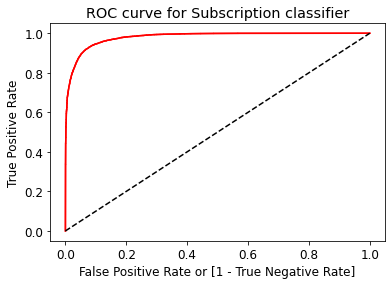

AUC-ROC Score: 0.8955447766131679


In [123]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

### ROC AUC Score
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [124]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

0.8955447766131679


<b>Comments
+ ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

+ ROC AUC of our model approaches towards 0.5. So, we can conclude that our classifier doesn't do a good job in predicting whether it will subscription or not.

### 8.5 Finding the Optimcal Threshold Value<a class="anchor" id="8.5"></a>

In [127]:
final_prediction = model.predict_proba(x_train_smenn)[:,1]
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y_train_smenn, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2358,0.775641,0.928248
2359,0.775128,0.928214
2360,0.774538,0.928214
2361,0.774015,0.928214
2357,0.775910,0.928214


If this was a use case for balaced dataset we would have gone with accuracy to select the optimal threshold value, otherwise it depends when data is imbalanced sometimes recall is more important than precision and sometimes the other way around and sometimes both are more important then we will go with F1-Score to select the optimal threshold value.

In [132]:
final_prediction = model.predict_proba(x_train_smenn)[:,1]
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])

f1_score_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    f1_score_ls.append(f1_score(y_train_smenn, y_pred))
    
f1_score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1_score_ls)],axis=1)
f1_score_ls.columns = ['thresholds', 'f1_score']
f1_score_ls.sort_values(by='f1_score', ascending=False, inplace=True)
f1_score_ls.head()

,thresholds,f1_score
2358,0.775641,0.940733
2361,0.774015,0.940717
2360,0.774538,0.940714
2359,0.775128,0.940710
2374,0.768132,0.940707


### 8.6 Classification Report<a class="anchor" id="8.6"></a>

In [133]:
# print the classification report

print(report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3504
           1       0.90      0.96      0.93      5314

    accuracy                           0.91      8818
   macro avg       0.91      0.90      0.90      8818
weighted avg       0.91      0.91      0.91      8818



Classification report shows the precision, recall, F1 and support scores for the Logistic Regression classification model.

+ Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.


+ Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 97% correctly that they would decline the offer.

In general, the report shows that <b>Logistic Regression model has great predictive power to identify the customers who would not subscribe to the term deposit</b>. However, because of the limited number of clients accepting the term deposit, there is a <b>need for stratified sampling or rebalancing to deal with this structural weakness</b> before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

### 8.7 Predictions<a class="anchor" id="8.7"></a>

In [142]:
#Predictions
y_pred = model.predict(x_train_smenn)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y_train_smenn,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
29388,1,1
29389,1,1
29390,1,1
29391,1,1


#### [Table of Contents](#0.1)

## 9. Zero Probability Phenomena<a class="anchor" id="9"></a>
Suppose we are predicting if a newly arrived email is spam or not. The algorithm predicts based on the keyword in the dataset. While analyzing the new keyword "money" for which there is no tuple in the dataset, in this scenario, the posterior probability will be zero and the model will assign 0 (Zero) probability because the occurrence of a particular keyword class is zero. This is referred to as "Zero Probability Phenomena".

We can get over this issue by using smoothing techniques. One of the techniques is Laplace transformation, which adds 1 more tuple for each keyword class pair. In the above example, let's say we have 1000 keywords in the training dataset. Where we have 0 tuples for keyword "money", 990 tuples for keyword "password" and 10 tuples for keyword "account" for classifying an email as spam. Without Laplace transformation the probability will be: 0 (0/1000), 0.990 (990/1000) and 0.010 (10/1000).

Now if we apply Laplace transformation and add 1 more tuple for each keyword then the new probability will be 0.001 (1/1003), 0.988 (991/1003), and 0.01 (11/1003). 

### 9.1 Hyperparameter Tuning to improve Accuracy<a class="anchor" id="9.1"></a>

Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation. 

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

In [150]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

gnb = GaussianNB()
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [151]:
gs_NB.best_params_

{'var_smoothing': 0.1873817422860384}

In [152]:
gs_NB.best_score_

0.8538969340808737

In [153]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

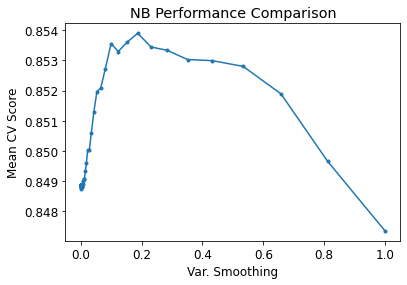

In [154]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [155]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8541619414833296


Text(0.5, 1.0, 'Test Data')

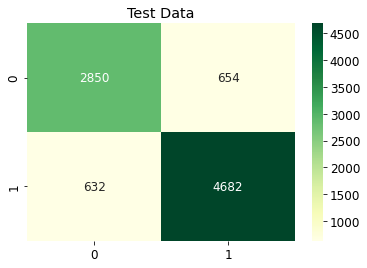

In [157]:
sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data')

In [158]:
# print the classification report

print(report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3504
           1       0.88      0.88      0.88      5314

    accuracy                           0.85      8818
   macro avg       0.85      0.85      0.85      8818
weighted avg       0.85      0.85      0.85      8818



## 10. Conclusion, Pros and Cons<a class="anchor" id="10"></a>
[Table of Contents](#0.1)

+ In this project, I build a Categorical Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 90%.
+ The training-set accuracy score is 92% while the test-set accuracy to be 90%. These two values are quite comparable. So, there is no sign of overfitting.
+ I have compared the model accuracy score which is 90% with null accuracy score which is 60%. So, we can conclude that our Categorical Naïve Bayes classifier model is doing a very good job in predicting the class labels.
+ ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.

### Pros
* Simple, Fast in processing, and effective in predicting the class of test dataset. So you can use it to make real-time predictions for example to check if an email is spam or not. Email services use this excellent algorithm to filter out spam emails.
* Effective in solving a multiclass problem which makes it perfect for identifying Sentiment. Whether it belongs to the positive class or the negative class.
* Does well with few samples for training when compared to other models like Logistic Regression.
* Easy to obtain the estimated probability for a prediction. This can be obtained by calculating the mean, for example, print(result.mean()). 
* It performs well in case of text analytics problems. 
* It can be used for multiple class prediction problems where we have more than 2 classes.

### Cons
* Relies on and often an incorrect assumption of independent features. In real life, you will hardly find independent features. For example, Loan eligibility analysis would depend on the applicant's income, age, previous loan, location, and transaction history which might be interdependent. 
* Not ideal for data sets with a large number of numerical attributes. If the number of attributes is larger then there will be high computation cost and it will suffer from the Curse of dimensionality.
* If a category is not captured in the training set and appears in the test data set then the model is assign 0 (zero) probability which leads to incorrect calculation. This phenomenon is referred to as 'Zero frequency' and to overcome 'Zero frequency' phenomena you will have to use smoothing techniques.